Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using pandas dataframes to open file

In [ ]:
data = pd.read_csv('data_Road_Traffic.csv')

# Initial data exploration

In [6]:
data.head(5)

,Unnamed: 0,Unnamed: 1,Estimated number of road traffic deaths,Estimated number of road traffic deaths.1,Estimated number of road traffic deaths.2,Estimated road traffic death rate (per 100 000 population),Estimated road traffic death rate (per 100 000 population).1,Estimated road traffic death rate (per 100 000 population).2
0,WHO region,Year,Both sexes,Male,Female,Both sexes,Male,Female
1,Global,2019,1282150 [1008400-1554236],958269 [747799-1160914],323881 [260601-393322],16.7 [13.1-20.2],24.8 [19.3-30.0],8.5 [6.8-10.3]
2,Global,2018,1268218 [1003208-1522610],948868 [743020-1138174],319350 [260189-384436],16.7 [13.2-20.0],24.8 [19.4-29.7],8.5 [6.9-10.2]
3,Global,2017,1256194 [1003092-1491114],939963 [742111-1114896],316231 [260982-376218],16.7 [13.4-19.9],24.8 [19.6-29.4],8.5 [7.0-10.1]
4,Global,2016,1252811 [1008680-1472508],937751 [746150-1100788],315060 [262530-371719],16.9 [13.6-19.8],25.0 [19.9-29.4],8.6 [7.1-10.1]


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 8 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Unnamed: 0                                                    141 non-null    object
 1   Unnamed: 1                                                    141 non-null    object
 2   Estimated number of road traffic deaths                       141 non-null    object
 3   Estimated number of road traffic deaths.1                     141 non-null    object
 4   Estimated number of road traffic deaths.2                     141 non-null    object
 5   Estimated road traffic death rate (per 100 000 population)    141 non-null    object
 6   Estimated road traffic death rate (per 100 000 population).1  141 non-null    object
 7   Estimated road traffic death rate (per 100 000 population).2  141 non-null    obj

In [8]:
print(data.columns)

Index(['Unnamed: 0', 'Unnamed: 1', 'Estimated number of road traffic deaths',
       'Estimated number of road traffic deaths.1',
       'Estimated number of road traffic deaths.2',
       'Estimated road traffic death rate (per 100 000 population)',
       'Estimated road traffic death rate (per 100 000 population).1',
       'Estimated road traffic death rate (per 100 000 population).2'],
      dtype='object')


### Cleaning the data

In [12]:
# Renaming columns and dropping row 0 for better legibility
data.rename(columns = {
    'Unnamed: 0':'Region',
    'Unnamed: 1':'Year',
    'Estimated number of road traffic deaths':'Deaths_Both',
    'Estimated number of road traffic deaths.1':'Deaths_Male',
    'Estimated number of road traffic deaths.2':'Deaths_Female',
    'Estimated road traffic death rate (per 100 000 population)':'Est_Rate_Both',
    'Estimated road traffic death rate (per 100 000 population).1':'Est_Rate_Male',
    'Estimated road traffic death rate (per 100 000 population).2':'Est_Rate_Female'
}, inplace=True)

# Drops row 0
data = data.drop(index = 0).reset_index(drop = True)

data.head(5)

,Region,Year,Deaths_Both,Deaths_Male,Deaths_Female,Est_Rate_Both,Est_Rate_Male,Est_Rate_Female
0,Global,2018,1268218 [1003208-1522610],948868 [743020-1138174],319350 [260189-384436],16.7 [13.2-20.0],24.8 [19.4-29.7],8.5 [6.9-10.2]
1,Global,2017,1256194 [1003092-1491114],939963 [742111-1114896],316231 [260982-376218],16.7 [13.4-19.9],24.8 [19.6-29.4],8.5 [7.0-10.1]
2,Global,2016,1252811 [1008680-1472508],937751 [746150-1100788],315060 [262530-371719],16.9 [13.6-19.8],25.0 [19.9-29.4],8.6 [7.1-10.1]
3,Global,2015,1245500 [1006560-1452519],933398 [744184-1086690],312102 [262376-365829],17.0 [13.7-19.8],25.2 [20.1-29.3],8.6 [7.2-10.0]
4,Global,2014,1248371 [1010498-1445710],937817 [748127-1084733],310554 [262371-360977],17.2 [13.9-19.9],25.6 [20.4-29.6],8.6 [7.3-10.0]


In [14]:
# Finding unique values of 'Region'
print(data['Region'].unique())

['Global' 'Africa' 'Americas' 'South-East Asia' 'Europe'
 'Eastern Mediterranean' 'Western Pacific']


In [16]:
# Cleaning up data

numeric_columns = ['Deaths_Both',
                   'Deaths_Male',
                   'Deaths_Female',
                   'Est_Rate_Both',
                   'Est_Rate_Male',
                   'Est_Rate_Female']

# Function to remove values in brackets
def clean_numbers(value):
    if isinstance(value, str) and '[' in value:
        return float(value.split('[')[0].strip())
    return value

for col in numeric_columns:
    data[col] = data[col].apply(clean_numbers)
    data[col] = pd.to_numeric(data[col])

data.head()
    


,Region,Year,Deaths_Both,Deaths_Male,Deaths_Female,Est_Rate_Both,Est_Rate_Male,Est_Rate_Female
0,Global,2018,1268218.0,948868.0,319350.0,16.7,24.8,8.5
1,Global,2017,1256194.0,939963.0,316231.0,16.7,24.8,8.5
2,Global,2016,1252811.0,937751.0,315060.0,16.9,25.0,8.6
3,Global,2015,1245500.0,933398.0,312102.0,17.0,25.2,8.6
4,Global,2014,1248371.0,937817.0,310554.0,17.2,25.6,8.6


In [23]:
columns_to_convert = ['Year','Deaths_Both', 'Deaths_Male', 'Deaths_Female']

for col in columns_to_convert:
    data[col] = data[col].astype(int)

print(data.dtypes)

Region              object
Year                 int64
Deaths_Both          int64
Deaths_Male          int64
Deaths_Female        int64
Est_Rate_Both      float64
Est_Rate_Male      float64
Est_Rate_Female    float64
dtype: object


# Analysis

In [24]:
# Setting plot settings
plt.style.use('ggplot')
sns.set_theme(style = "whitegrid")

### Global Data

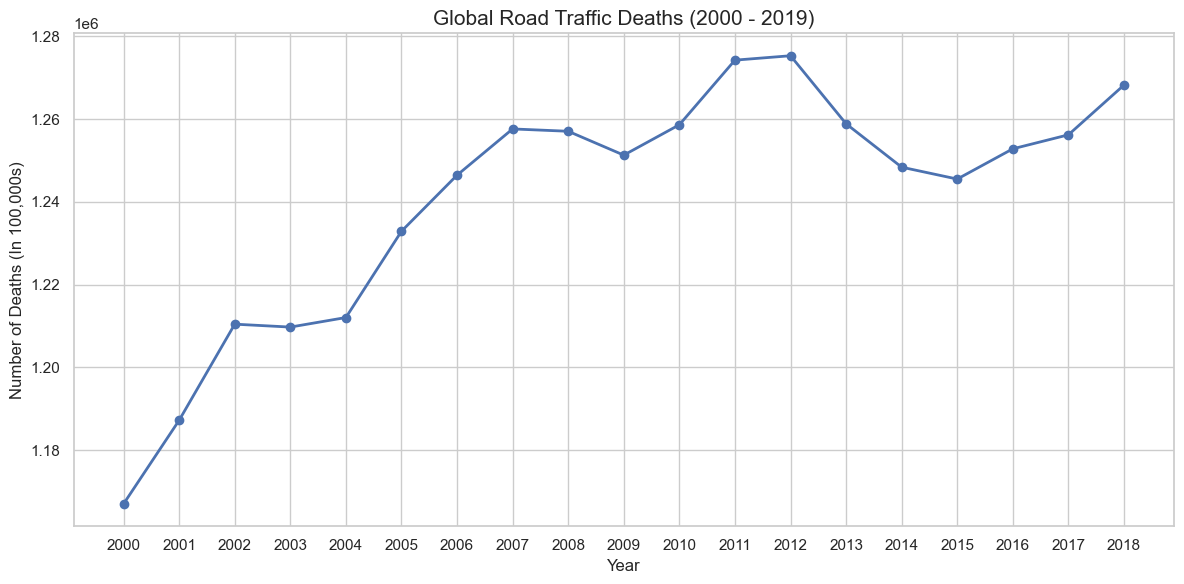

In [30]:
global_data = data[data['Region'] == 'Global']

# Plot Data
plt.figure(figsize=(12,6))
plt.plot(global_data['Year'], global_data['Deaths_Both'], marker = 'o', linewidth = 2)
plt.title('Global Road Traffic Deaths (2000 - 2019)', fontsize = 15)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Deaths (In 100,000s)', fontsize = 12)

# Makes year values appear as integers
plt.xticks(ticks = global_data['Year'].unique(), labels = [int(year) for year in global_data['Year'].unique()])

plt.grid(True)
plt.tight_layout()
plt.show()

### Comparing Deaths by region (2019)

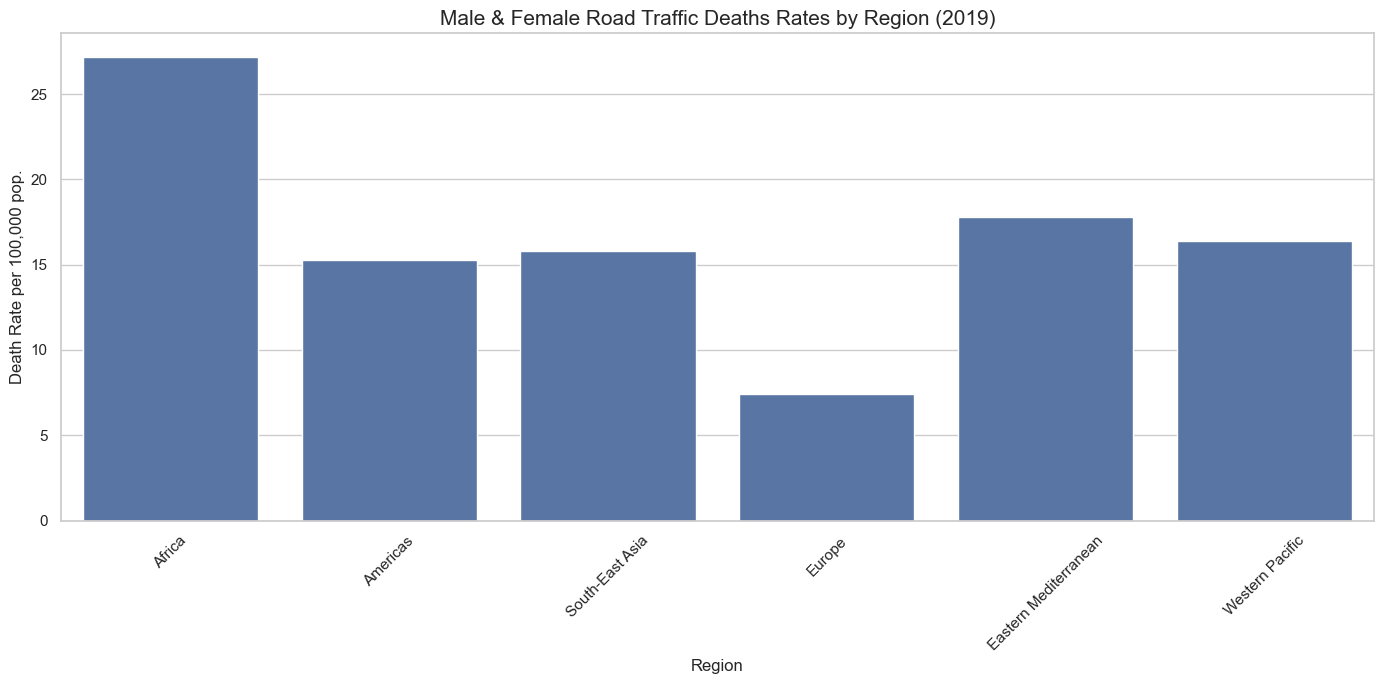

In [32]:
recent_data = data[data['Year'] == 2019]

plt.figure(figsize = (14,7))
sns.barplot(x = 'Region',
            y = 'Est_Rate_Both',
            data = recent_data)

plt.title('Male & Female Road Traffic Deaths Rates by Region (2019)', fontsize = 15)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Death Rate per 100,000 pop.', fontsize = 12)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Heatmap

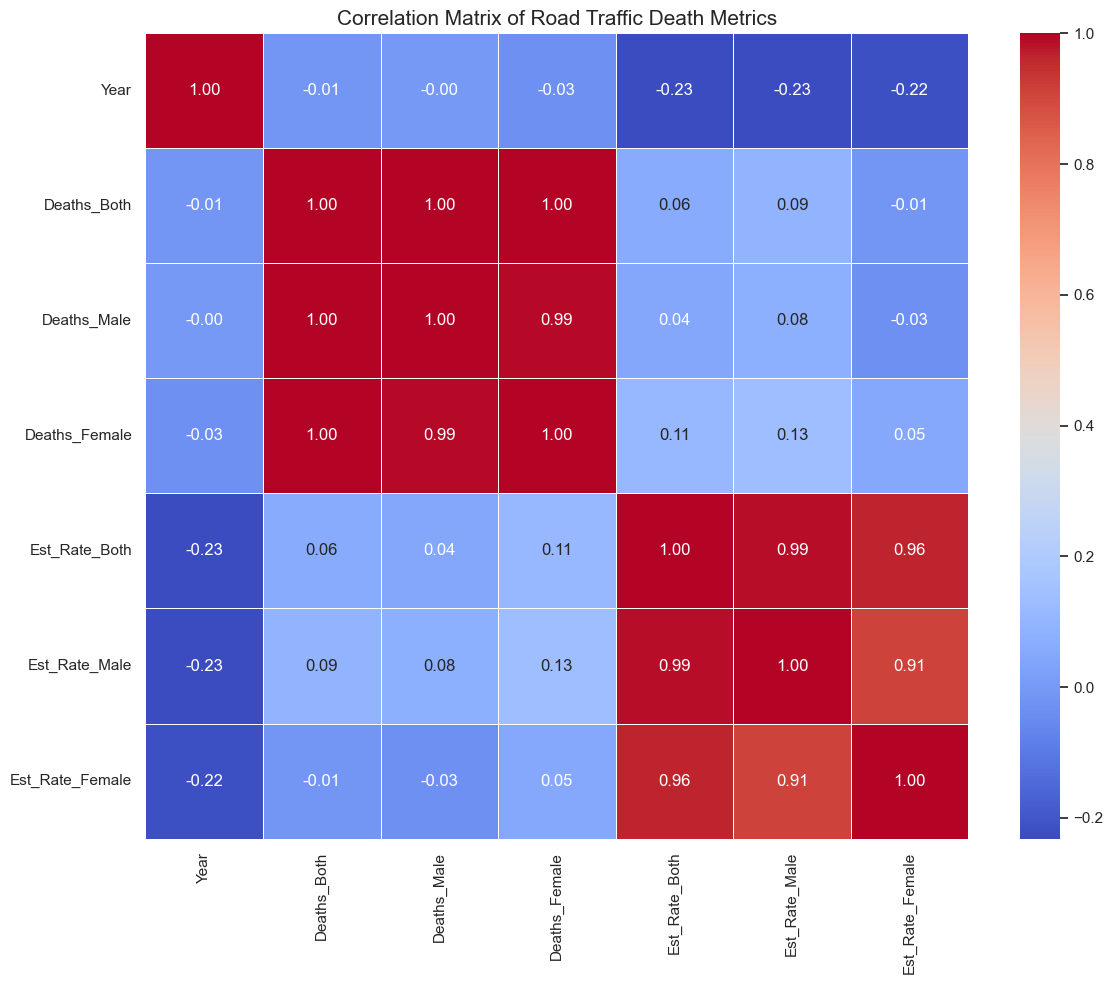

In [34]:
corr_data = data.select_dtypes(include = [np.number])
corr = corr_data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrix of Road Traffic Death Metrics', fontsize=15)
plt.tight_layout()
plt.show()

### Comparison by Region

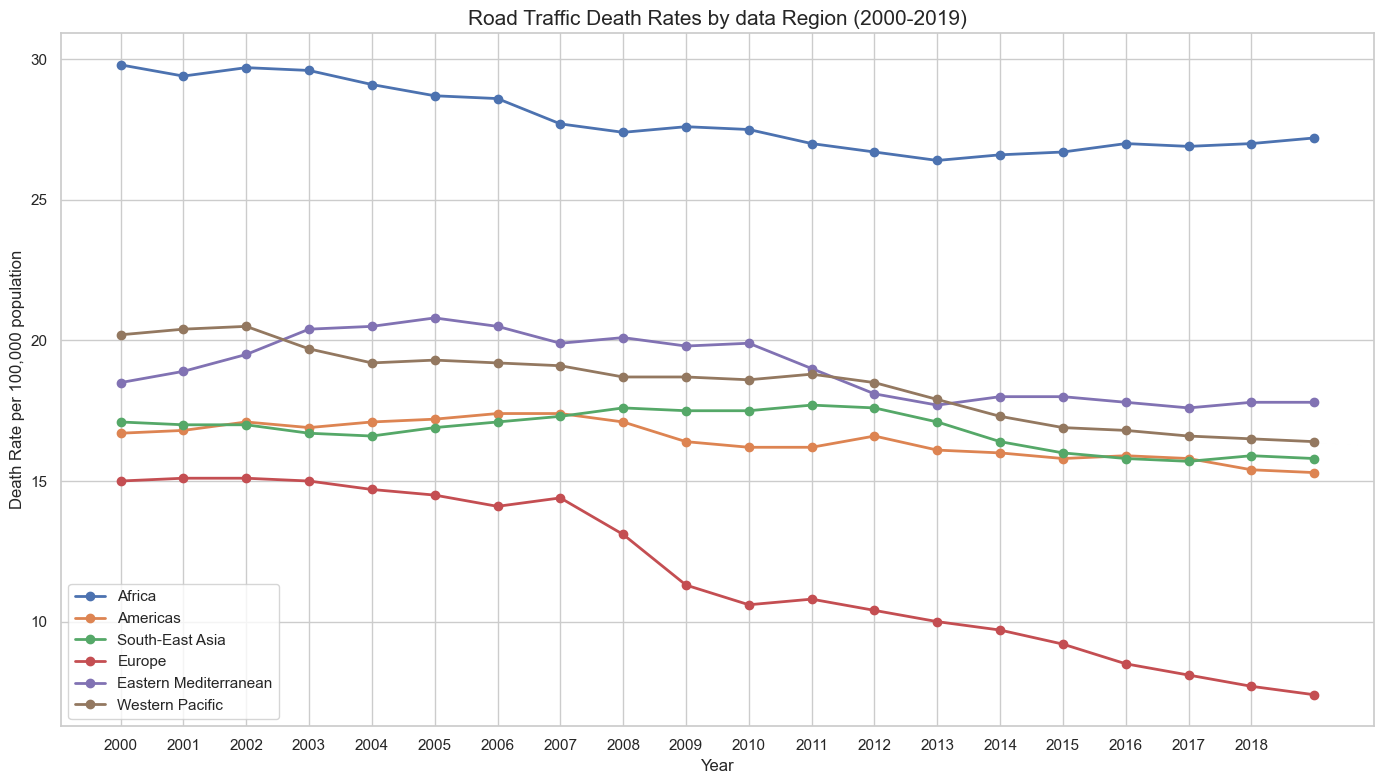

In [36]:
# Line Plot Showing Trends for each region

plt.figure(figsize = (14,8))
for region in data['Region'].unique():
    if region != 'Global':
        region_data = data[data['Region'] == region]
        plt.plot(region_data['Year'],
                 region_data['Est_Rate_Both'],
                 marker = 'o', linewidth = 2, label = region)
        
plt.title('Road Traffic Death Rates by data Region (2000-2019)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Death Rate per 100,000 population', fontsize=12)
# Makes year values appear as integers
plt.xticks(ticks = global_data['Year'].unique(), labels = [int(year) for year in global_data['Year'].unique()])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()